[18:35:32] WARNING: not removing hydrogen atom without neighbors
[18:35:32] WARNING: not removing hydrogen atom without neighbors
[18:35:32] WARNING: not removing hydrogen atom without neighbors
[18:35:32] WARNING: not removing hydrogen atom without neighbors
[18:35:32] WARNING: not removing hydrogen atom without neighbors
[18:35:32] WARNING: not removing hydrogen atom without neighbors
[18:35:32] WARNING: not removing hydrogen atom without neighbors
[18:35:32] WARNING: not removing hydrogen atom without neighbors
[18:35:32] WARNING: not removing hydrogen atom without neighbors


Epoch 1/50, Training Loss = 0.6465897016538796, Training accuracy = 0.6797040169133193
Epoch 1/50, Evaluation Loss: 0.5978005568634925, Evaluation accuracy: 0.7241379310344828
Epoch 2/50, Training Loss = 0.6241732885384673, Training accuracy = 0.6966173361522199
Epoch 2/50, Evaluation Loss: 0.5978005568639294, Evaluation accuracy: 0.7241379310344828
Epoch 3/50, Training Loss = 0.6241732885375978, Training accuracy = 0.6966173361522199
Epoch 3/50, Evaluation Loss: 0.5978005568643616, Evaluation accuracy: 0.7241379310344828
Epoch 4/50, Training Loss = 0.6241732885367274, Training accuracy = 0.6966173361522199
Epoch 4/50, Evaluation Loss: 0.597800556864794, Evaluation accuracy: 0.7241379310344828
Epoch 5/50, Training Loss = 0.6241732885358575, Training accuracy = 0.6966173361522199
Epoch 5/50, Evaluation Loss: 0.5978005568652264, Evaluation accuracy: 0.7241379310344828
Epoch 6/50, Training Loss = 0.6241732885349872, Training accuracy = 0.6966173361522199
Epoch 6/50, Evaluation Loss: 0.597

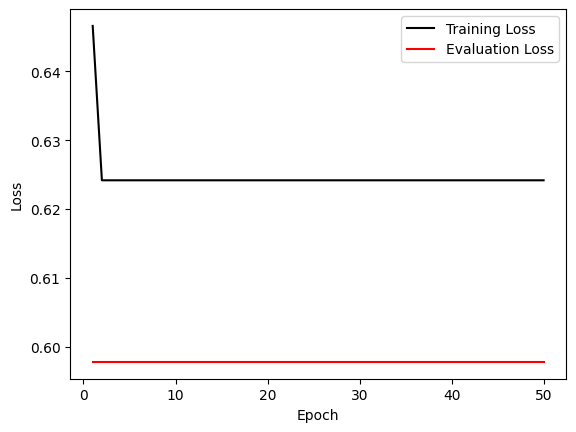

In [2]:
import pandas as pd
from Net import *
dataset = pd.read_csv("data/filtered_sider.csv")
#task = "Hepatobiliary disorders"
task = "Metabolism and nutrition disorders"
#task = "Pregnancy puerperium and perinatal conditions"
#task = "Renal and urinary disorders"
#task = "Injury poisoning and procedural complications"
#task = "Product issues"
#task = "Reproductive system and breast disorders"
network = [Sum_pooling(8),
           GIN(8),
           Sigmoid(),
           GIN(8),
           Sigmoid(),
           GIN(8),
           Sigmoid(),
           GIN(8),
           Sigmoid(),
           GIN(8),
           Sigmoid(),
           GlobalMeanPooling(),
           Dense(8,100),
           Convolution(100,3),
           BatchNorm(eps = 1e-5, momentum = 0.8, batch_size = 32),
           ReLU(),
           Convolution(98,3),
           BatchNorm(eps = 1e-5, momentum = 0.8, batch_size = 32),
           ReLU(),
           Convolution(96,3),
           BatchNorm(eps = 1e-5, momentum = 0.8, batch_size = 32),
           ReLU(),
           Dense(94,1),
           Sigmoid()           
]


MBGD(network, binary_cross_entropy, binary_cross_entropy_prime, dataset, task, epochs = 50,
       learning_rate = 0.05, batch_size = 32, verbose = True)